### Project Overview

The data is related with direct marketing campaigns of a Portuguese banking instituation. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) wouls be ('yes') or not ('no') subscribed.

`bank-additional-full.csv` with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al.,2014]
  
The smallest datasets are provided to test more computatioally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

User Details:
   1. `age` (numeric)

   2. `job` : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

   3. `marital` : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

   4. `education` (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

   5. `default`: has credit in default? (categorical: 'no','yes','unknown')

   6.  `housing`: has housing loan? (categorical: 'no','yes','unknown')

   7. `loan`: has personal loan? (categorical: 'no','yes','unknown')

Related with the last contact of the current campaign:
   8. `contact`: contact communication type (categorical: 'cellular','telephone')

   9. `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

   10. `day_of_week`: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

   11. `duration`: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:

   12. `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)

   13. `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

   14. `previous`: number of contacts performed before this campaign and for this client (numeric)

   15. `poutcome`: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and economic context attributes
   16. `emp.var.rate`: employment variation rate - quarterly indicator (numeric)

   17. `cons.price.idx`: consumer price index - monthly indicator (numeric)

   18. `cons.conf.idx`: consumer confidence index - monthly indicator (numeric)

   19. `euribor3m`: euribor 3 month rate - daily indicator (numeric)

   20. `nr.employed`: number of employees - quarterly indicator (numeric)

Output variable (desired target):

   21. `y` - has the client subscribed a term deposit? (binary: 'yes','no')

### Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import normalize
from scipy.stats import boxcox, probplot, norm, shapiro
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from time import time

### Data Loading

In [2]:
df_bank = pd.read_csv('./datasets/bank-additional-full.csv', sep=";")

df_bank.columns = ['age', 'job', 'marital', 'education', 'credit', 'housing', 'loan','contact', 'month', 'day_of_week',
              'duration', 'campaign', 'pdays','previous', 'poutcome', 'emp.var.rate', 'cons.price.idx','cons.conf.idx',
              'euribor3m', 'nr.employed', 'subscribed']

# 5 data pertama
df_bank.head()

,age,job,marital,education,credit,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# ringkasan tipe data setiap colom
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   credit          41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df_bank.shape

(41188, 21)

In [5]:
df_bank.isnull().sum()

age               0
job               0
marital           0
education         0
credit            0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

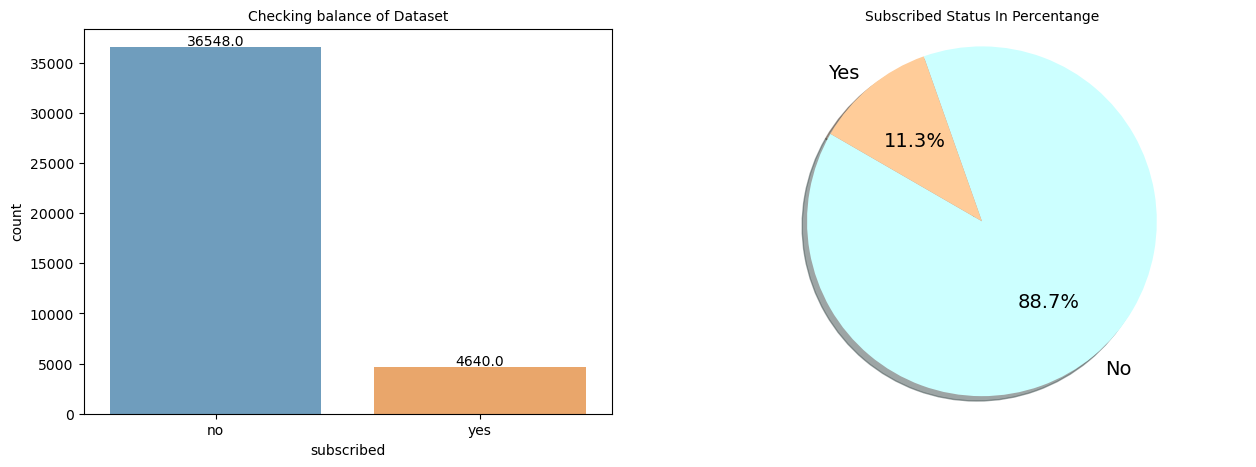

In [6]:
plt.rcParams['figure.figsize']=15,5
plt.subplot(121)
plt.title('Checking balance of Dataset', fontsize=10)
s = sns.countplot(x="subscribed", data=df_bank, alpha=0.7)
for p in s.patches:
    s.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 4), 
                textcoords = 'offset points')


ax = plt.subplot(122)
mush_classpie = df_bank['subscribed'].value_counts()
mush_size = mush_classpie.values.tolist()
mush_types = mush_classpie.axes[0].tolist()
mush_labels = 'No', 'Yes'
colors = ['#CCFFFF', '#FFCC99']
plt.title('Subscribed Status In Percentange', fontsize=10)
patches, texts, autotexts = plt.pie(mush_size, labels=mush_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')  
plt.show()

Berdasarkan hasil grafik diatas bisa dilihat bahwa subscribed dengan status Yes memiliki persentase 11,3% dan dengan status No sebesar 88,7%

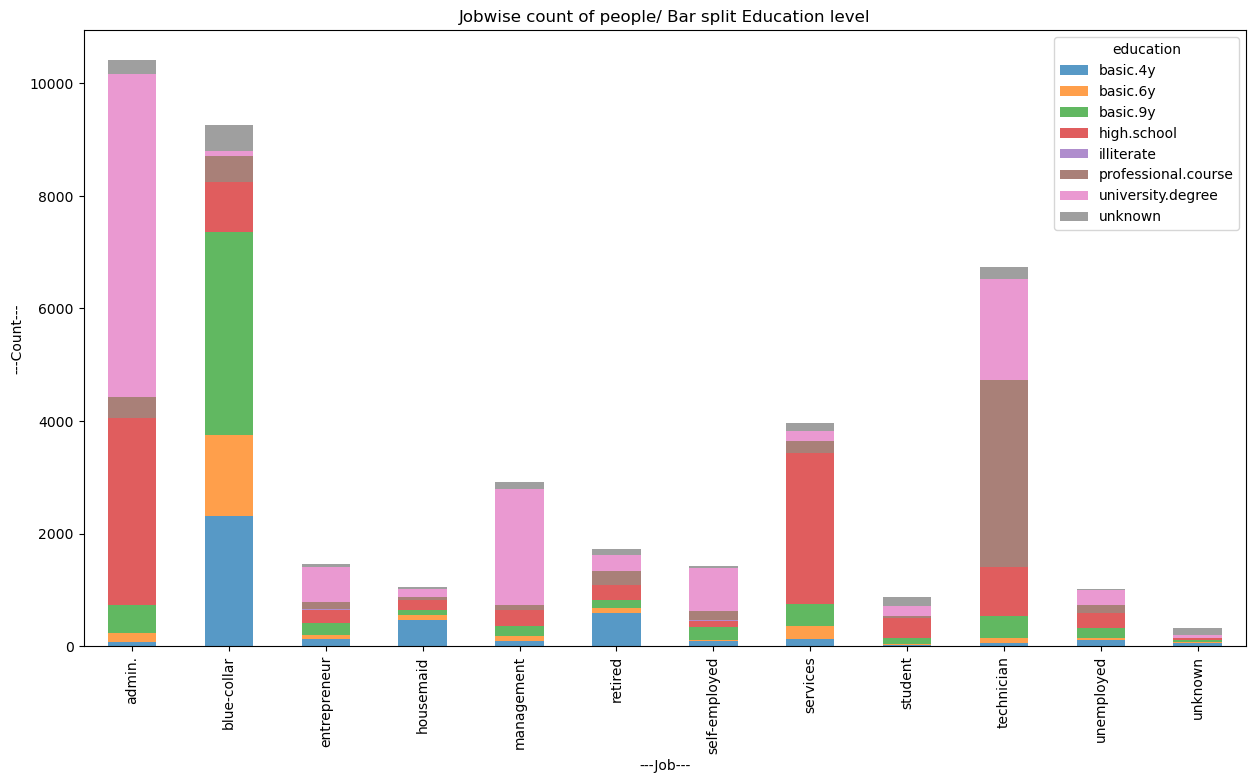

In [7]:
df_pivot = pd.pivot_table(df_bank,columns='education', index='job', aggfunc='count',values='age')
df_pivot.plot(kind='bar',stacked=True , figsize=(15,8), alpha=0.75)
plt.title('Jobwise count of people/ Bar split Education level')
plt.ylabel('---Count---')
plt.xlabel('---Job---')
plt.show()

Berdasarkan grafik batang diatas bisa dilihat bahwa pekerjaan `admin` memiliki jumlah paling banyak dengan pendidikan `university.degree` paling banyak.

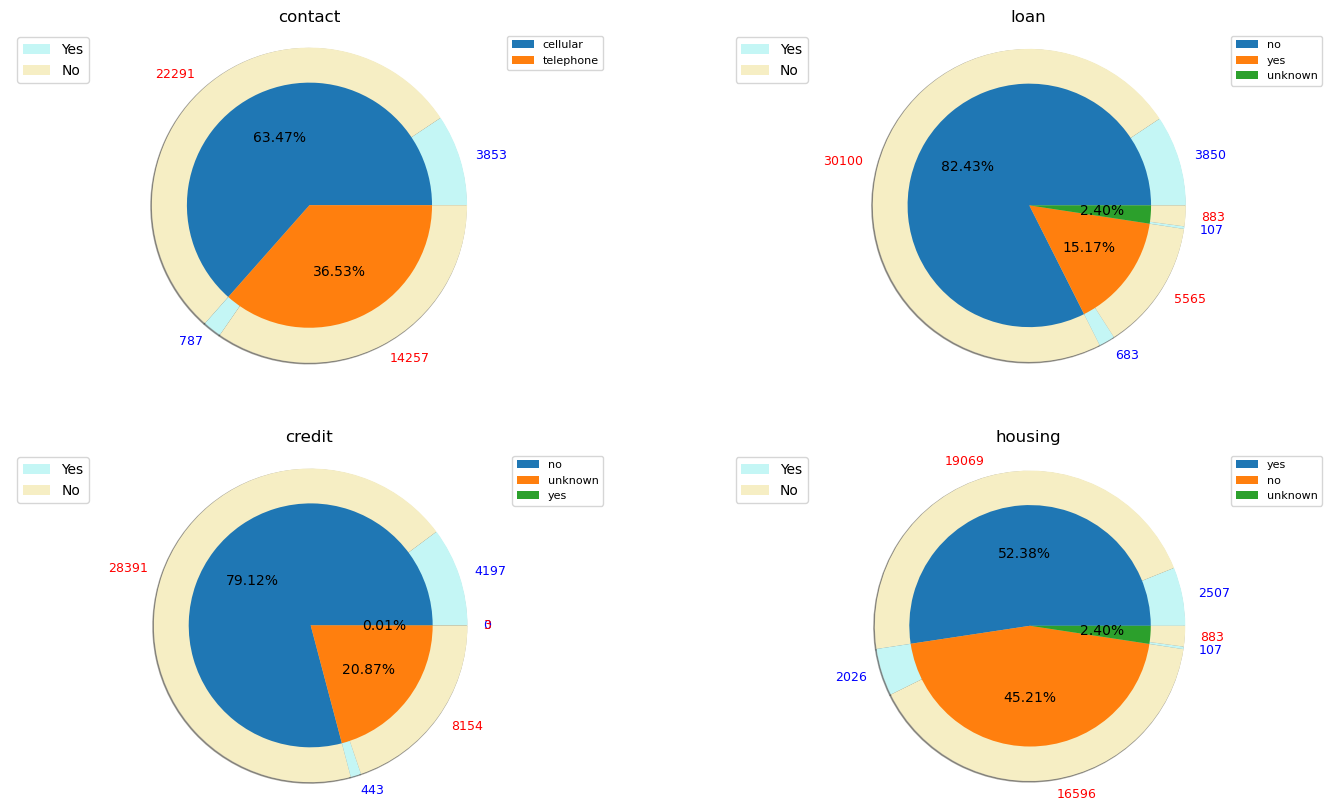

In [8]:
f, axes = plt.subplots(4,1, figsize=(17,10), sharey = True) 
num_col = ['contact', 'loan', 'credit', 'housing']

for j,col in enumerate(num_col):
    cols = df_bank[col].value_counts()
    pop_size = cols.values.tolist()
    pop_types = cols.axes[0].tolist()
    poisonous_pop = [] 
    edible_pop = []   
    for pop in pop_types: 
        size = len(df_bank[df_bank[col] == pop].index)
        edibles = len(df_bank[(df_bank[col] == pop) & (df_bank['subscribed'] == 'yes')].index)
        edible_pop.append(edibles)
        poisonous_pop.append(size-edibles)
    combine_ed_poi = []
    for i in range(0,len(edible_pop)):
        combine_ed_poi.append(edible_pop[i])
        combine_ed_poi.append(poisonous_pop[i])

    #Double pie chart.
    plt.subplot(2,2,j+1)
    plt.title(col)
    #Outer Pie Chart
    patches1, texts1 = plt.pie(combine_ed_poi,radius = 4.5,labels= combine_ed_poi,
                                    colors=['#C4F6F5','#F6EEC4'], shadow=True, labeldistance= 1.1)
    for i in range(0,len(texts1)):
        if(i%2==0):
            texts1[i].set_color('blue')
        else:
            texts1[i].set_color('red')
    for aut in texts1:
        aut.set_fontsize(9)
    #Inner Pie Chart
    patches2, texts2, autotexts2 = plt.pie(pop_size, radius = 3.5,
            autopct='%1.2f%%', shadow=True, labeldistance= 4.2)
    for aut in autotexts2:
        aut.set_fontsize(10)
        aut.set_horizontalalignment('center')
    #Set 2 Legends to the plot.
    first_legend   = plt.legend(patches1, ['Yes','No'], loc="upper left", fontsize=10)
    second_ledgend = plt.legend(patches2, pop_types, loc="best",fontsize=8)
    plt.gca().add_artist(first_legend)
    plt.axis('equal')
plt.show()

### Data Preprocessing

In [9]:
df_bank.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41188 non-null  object
 1   marital      41188 non-null  object
 2   education    41188 non-null  object
 3   credit       41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   poutcome     41188 non-null  object
 10  subscribed   41188 non-null  object
dtypes: object(11)
memory usage: 3.5+ MB


In [10]:
dict_job = {
    "job":{
        "housemaid":1,
        "unemployed":0,
        "entrepreneur":4,
        "blue-collar":1,
        "services":3,
        "admin.":2,
        "technician":2,
        "retired":1,
        "management":4,
        "self-employed":3,
        "unknown":1,
        "student":0.5
    }}
dict_education = {
    "education":{
        "basic.4y":1,
        "basic.6y":1,
        "basic.9y":1,
        "high.school":1,
        "professional.course":2,
        "university.degree":2,
        "illiterate":0.9,
        "unknown":0.9
    }}

dict_poutcome = {
    "poutcome":{
        "nonexistent":0,
        "failure":0,
        "success":1
    }}
dict_y = {
    "subscribed":{
        "no":0,
        "yes":1
    }}

In [11]:
for i in [dict_poutcome,dict_y, dict_education, dict_job]:
    df_bank.replace(i,inplace=True)

In [12]:
df_bank.head()

,age,job,marital,education,credit,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,1.0,married,1.0,no,no,no,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,3.0,married,1.0,unknown,no,no,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,3.0,married,1.0,no,yes,no,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2.0,married,1.0,no,no,no,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,3.0,married,1.0,no,no,yes,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [13]:
lc_X1 = LabelEncoder()
lst = ['marital','credit','housing','loan']

for i in lst:
    df_bank[i] = lc_X1.fit_transform(df_bank[i])

In [14]:
df_1 = pd.get_dummies(df_bank,
                      columns=['marital','credit','housing','loan'],
                      drop_first=True)
df_bank.head()

,age,job,marital,education,credit,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,1.0,1,1.0,0,0,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,3.0,1,1.0,1,0,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,3.0,1,1.0,0,2,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2.0,1,1.0,0,0,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,3.0,1,1.0,0,0,2,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [15]:
# Menghitung korelasi semua variabel dengan variabel subscribed
corr = df_1.corr()
print(corr['subscribed'].sort_values(axis=0, ascending=True))

nr.employed      -0.354678
pdays            -0.324914
euribor3m        -0.307771
emp.var.rate     -0.298334
cons.price.idx   -0.136211
credit_1         -0.099293
campaign         -0.066357
marital_1        -0.043398
job              -0.027963
loan_2           -0.004466
credit_2         -0.003041
loan_1           -0.002270
housing_1        -0.002270
marital_3         0.005211
housing_2         0.011743
age               0.030399
education         0.045916
marital_2         0.054133
cons.conf.idx     0.054878
previous          0.230181
poutcome          0.316269
duration          0.405274
subscribed        1.000000
Name: subscribed, dtype: float64


In [16]:
df_1.drop(columns=[
    'nr.employed','pdays','euribor3m','emp.var.rate',
    'cons.price.idx','contact','month','campaign', 'day_of_week'
    ], axis=0, inplace=True)

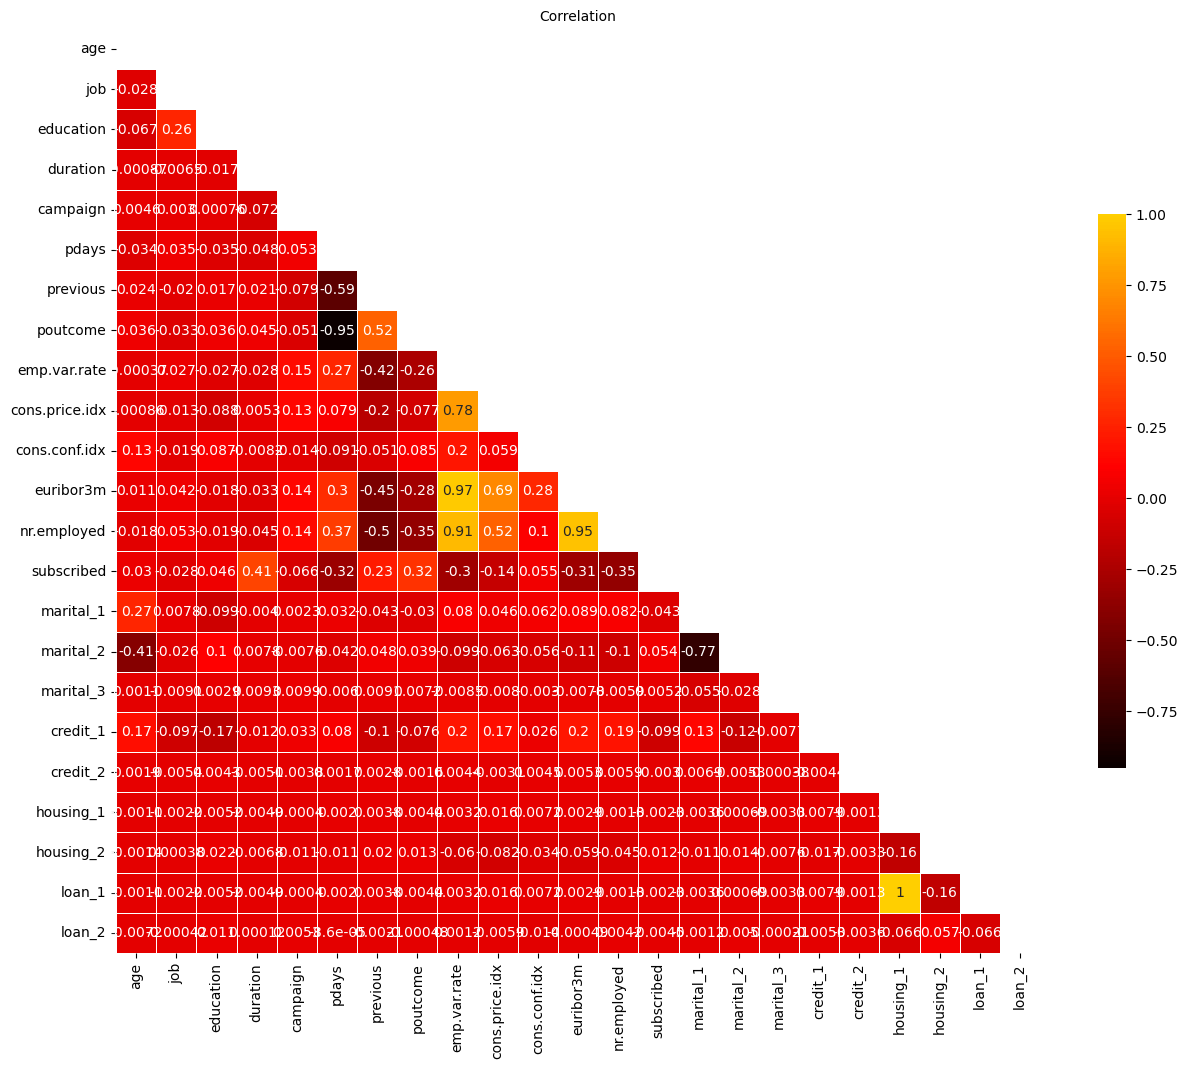

In [17]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(15,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#Drawing heatmap
sns.heatmap(corr, 
            mask=mask,
            cmap='hot', 
            vmax=1, 
            center=0.5, 
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .6},
            annot=True
           )
plt.title("Correlation", fontsize =10)
plt.show()

### Split data

In [18]:
X = df_1.drop(columns = 'subscribed',axis=1).values
y = df_1['subscribed'].values 

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=128)

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [21]:
def print_scores(model, labels, pred):
    # Confusion matrix
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)    
    recall = round(recall_score(labels, pred), 3)
    f1 = round(f1_score(labels, pred), 3)
    
    cm = confusion_matrix(labels, pred)
    df = pd.DataFrame(cm)
    
    labels = [f"TP: {df[0][0]} ",f"TN: {df[1][1]} ",f"FP: {df[1][0]} ",f"FN: {df[0][1]} "]
    labels = np.asarray(labels).reshape(2,2)
    
    f, ax = plt.subplots(figsize=(6,5))
    sns.heatmap(cm, annot=labels, fmt='', cmap='PuRd', ax=ax)    
    print(f"{model}:: Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, f1_score: {f1}")

In [22]:
def print_cv_result(results):
    print(f"Best Params : {results.best_params_}\n")
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print(f'{round(mean, 3)} (+/-{round(std * 2, 3)}) for {params}')

### Pendefinisian model
#### Support Vector Machine

SVM Time:44418.340000000004
SVM:: Accuracy: 0.903, Precision: 0.611, Recall: 0.324, f1_score: 0.424


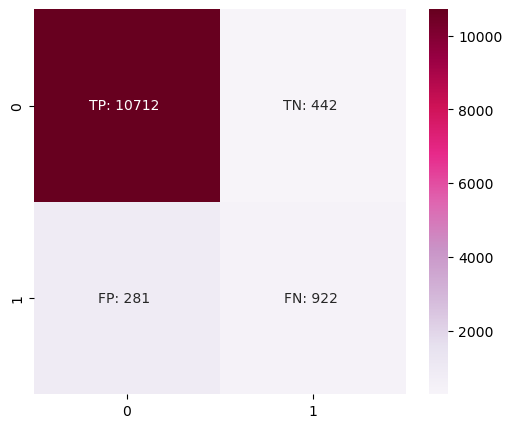

In [23]:
start = time()
svc = SVC(kernel = "rbf", C=10)
svc.fit(X_train,y_train)
y_pred_svm = svc.predict(X_test)
end = time()
print(f"SVM Time:{round((end - start), 5) * 1000}")
print_scores("SVM", y_test, y_pred_svm)
plt.show()

#### Logistic regression

LGR:: Accuracy: 0.902, Precision: 0.604, Recall: 0.331, f1_score: 0.427


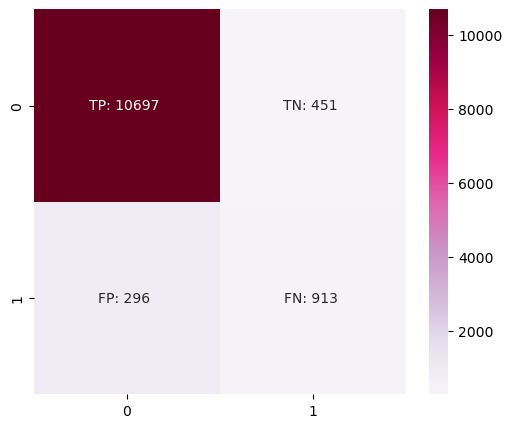

In [24]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_pred_lgr = lgr.predict(X_test)
print_scores("LGR", y_test, y_pred_lgr)
plt.show()

#### K-Nearest Neighbor

KNN:: Accuracy: 0.894, Precision: 0.532, Recall: 0.358, f1_score: 0.428


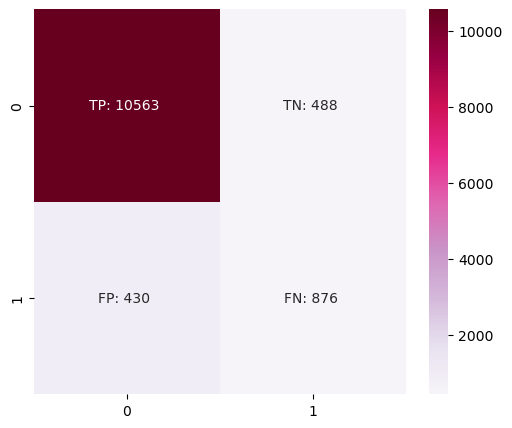

In [25]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
print_scores("KNN", y_test, y_pred_knn)
plt.show()

#### Decission Tree

Decission Tree:: Accuracy: 0.884, Precision: 0.474, Recall: 0.487, f1_score: 0.48


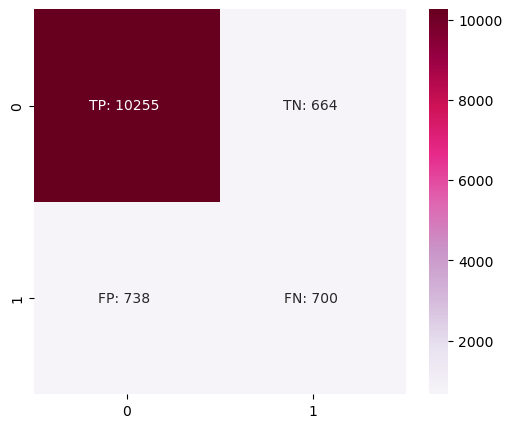

In [26]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)
print_scores("Decission Tree", y_test, y_pred_tree)
plt.show()

#### Random Forest

Random Forest:: Accuracy: 0.905, Precision: 0.591, Recall: 0.465, f1_score: 0.52


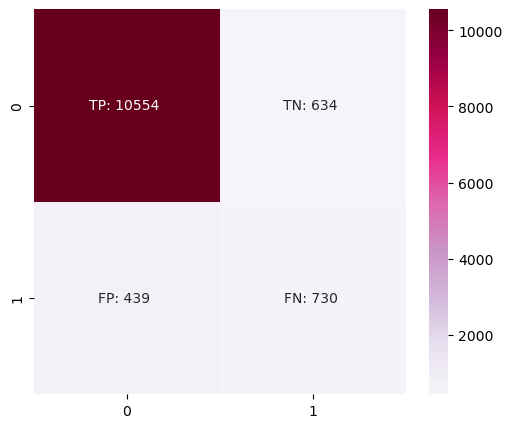

In [27]:
model_rf = RandomForestClassifier(n_estimators=200)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print_scores("Random Forest", y_test, y_pred_rf)
plt.show()

#### Naive Bayes

/home/katapang/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NB:: Accuracy: 0.89, Precision: 0.0, Recall: 0.0, f1_score: 0.0


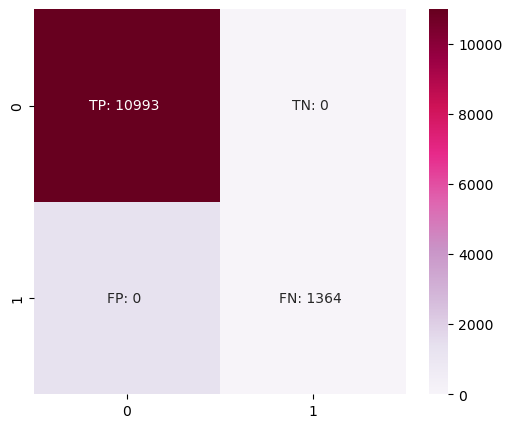

In [28]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)
print_scores("NB", y_test, y_pred_nb)
plt.show()

Berdasarkan dari beberapa algoritma yang dilakukan klasifikasi, didapatkan bahwa algoritma Random Forest dan Support Vektor Machine memiliki performa model yang paling baik diantara algoritma klasifikasi yang lain dengan accuracy sebesar 95%.